<a href="https://colab.research.google.com/github/pasatsanduadrian/repo/blob/master/ProiectDizertatie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install osmnx matplotlib contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 18.9 MB/s eta 0:00:00


##Generarea hartii si fisierului .mat
https://www.openstreetmap.org/search?query=strada%20mosoaia%2037%2C%20bucuresti#map=19/44.37915/26.13062

Dimensiunea imaginii (W x H in pixels): 500x500
MAT file saved at /content/ReteauaStradala.mat


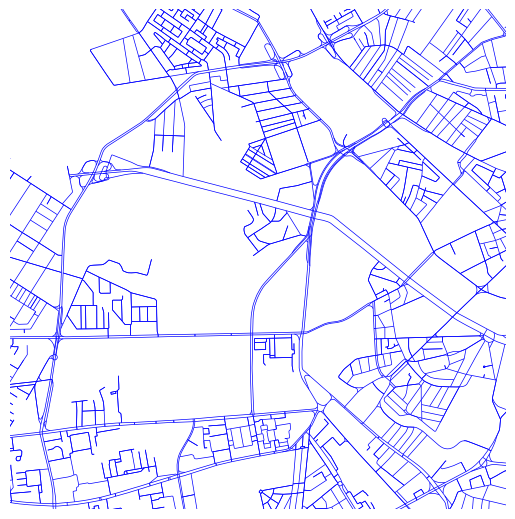

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np

# Setăm coordonatele centrului și distanța în jurul centrului pentru a defini harta
center_latitude, center_longitude = 44.4399, 26.0550
dist = 2500  # Distanța în metri

# Obținem rețeaua stradală pentru coordonatele și distanța specificate
G = ox.graph_from_point((center_latitude, center_longitude), dist=dist, network_type='drive')

# Setăm rezoluția dorită în metri per pixel
dxy = 10  # Pasul grilei în metri
dpi = 100  # DPI-ul (pixeli per inch) pentru figura matplotlib
size_in_pixels = 5000 / dxy  # Numărul de pixeli care reprezintă 5000 metri

# Calculăm figsize în inch pentru a avea rezoluția dorită
figsize = (size_in_pixels / dpi, size_in_pixels / dpi)

# Plotează graficul fără a afișa sau închide plot-ul
fig, ax = ox.plot_graph(G, bgcolor='w', edge_color='blue', node_size=0, edge_linewidth=0.5,
                        show=False, close=False, figsize=figsize)

# Aplicăm tight_layout cu padding 0 pentru a reduce spațiul în exces
fig.tight_layout(pad=0)

# Setăm limitele axelor pentru a elimina orice spațiu suplimentar
ax.set_xlim([center_longitude - 0.025, center_longitude + 0.025])
ax.set_ylim([center_latitude - 0.018, center_latitude + 0.018])

# Convertim plot-ul într-un array de imagine
fig.canvas.draw()
image_array = np.array(fig.canvas.renderer._renderer)
image_array = image_array[..., :3]  # Folosim doar canalele RGB
print(f"Dimensiunea imaginii (W x H in pixels): {image_array.shape[1]}x{image_array.shape[0]}")


# Determinarea celui mai apropiat nod de coordonatele date
nearest_node = ox.nearest_nodes(G, center_longitude, center_latitude)
emission_source_x = G.nodes[nearest_node]['x']
emission_source_y = G.nodes[nearest_node]['y']

# Salvăm datele într-un fișier .mat
mat_data = {
    "A": image_array,
    "emission_source_x": np.array([emission_source_x]),
    "emission_source_y": np.array([emission_source_y])
}

# Salvăm fișierul .mat
mat_file_path = "/content/ReteauaStradala.mat"
sio.savemat(mat_file_path, mat_data)

print(f"MAT file saved at {mat_file_path}")

MAT file saved at /content/SuprapunereBasemap.mat


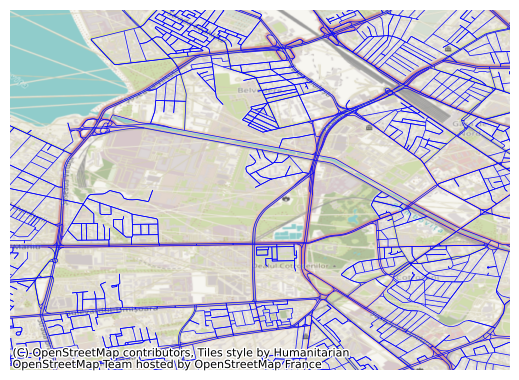

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np
import scipy.io as sio

# Instalare necesară în Colab
# !pip install osmnx matplotlib contextily  # Trebuie rulat doar o singură dată.

# Setăm coordonatele centrului și distanța în jurul centrului pentru a defini harta
center_latitude, center_longitude = 44.4399, 26.0550
dist = 2500  # Distanța în metri

# Obținem rețeaua stradală pentru coordonatele și distanța specificate
G = ox.graph_from_point((center_latitude, center_longitude), dist=dist, network_type='drive')

# Setăm rezoluția dorită în metri per pixel
dxy = 10  # Pasul grilei în metri
dpi = 100  # DPI-ul (pixeli per inch) pentru figura matplotlib
size_in_pixels = 5000 / dxy  # Numărul de pixeli care reprezintă 5000 metri

# Calculăm figsize în inch pentru a avea rezoluția dorită
figsize = (size_in_pixels / dpi, size_in_pixels / dpi)

# Plotează graficul fără a afișa sau închide plot-ul
fig, ax = ox.plot_graph(G, bgcolor='none', edge_color='blue', node_size=0, edge_linewidth=0.5,
                        show=False, close=False, figsize=figsize)

# Setăm limitele axelor pentru a elimina orice spațiu suplimentar și pentru a corecta aspectul hărții
ax.set_xlim([center_longitude - 0.025, center_longitude + 0.025])
ax.set_ylim([center_latitude - 0.018, center_latitude + 0.018])

# Adăugăm basemap
ctx.add_basemap(ax, crs="EPSG:4326")

# Convertim plot-ul într-un array de imagine
fig.canvas.draw()
image_array = np.array(fig.canvas.renderer._renderer)
image_array = image_array[..., :3]  # Folosim doar canalele RGB

# Determinarea celui mai apropiat nod de coordonatele date
nearest_node = ox.nearest_nodes(G, center_longitude, center_latitude)
emission_source_x = G.nodes[nearest_node]['x']
emission_source_y = G.nodes[nearest_node]['y']

# Salvăm datele într-un fișier .mat
mat_data = {
    "A": image_array,
    "emission_source_x": np.array([emission_source_x]),
    "emission_source_y": np.array([emission_source_y])
}

# Salvăm fișierul .mat
mat_file_path = "/content/SuprapunereBasemap.mat"
sio.savemat(mat_file_path, mat_data)

# Aplicăm tight_layout cu padding redus la zero pentru a limita spațiul în exces
plt.tight_layout(pad=0)

# Salvăm imaginea cu setările de tight bounding box și fără padding suplimentar
plt.savefig(mat_file_path.replace('.mat', '.png'), bbox_inches='tight', pad_inches=0, dpi=dpi)

print(f"MAT file saved at {mat_file_path}")


##rulare model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from tqdm import tqdm
import pandas as pd


def calc_sigmas(CATEGORY,x1):
    # Your calc_sigmas function code here
    x=np.abs(x1)
    a=np.zeros(np.shape(x));
    b=np.zeros(np.shape(x));
    c=np.zeros(np.shape(x));
    d=np.zeros(np.shape(x));
    if CATEGORY == 1: # very unstable
        # vertical
        ind=np.where((x<100.) & (x>0.));
        a[ind]=122.800;b[ind]=0.94470;
        ind=np.where((x>=100.) & (x<150.));
        a[ind]=158.080;b[ind]=1.05420;
        ind=np.where((x>=150.) & (x<200.));
        a[ind]=170.220;b[ind]=1.09320;
        ind=np.where((x>=200.) & (x<250.));
        a[ind]=179.520;b[ind]=1.12620;
        ind=np.where((x>=250.) & (x<300.));
        a[ind]=217.410;b[ind]=1.26440;
        ind=np.where((x>=300.) & (x<400.));
        a[ind]=258.89;b[ind]=1.40940;
        ind=np.where((x>=400.) & (x<500.));
        a[ind]=346.75;b[ind]=1.7283;
        ind=np.where((x>=500.) & (x<3110.));
        a[ind]=453.85;b[ind]=2.1166;
        ind=np.where((x>=3110.));
        a[ind]=453.85;b[ind]=2.1166;
        # cross wind
        c[:]=24.1670;
        d[:]=2.5334;
    elif CATEGORY == 2: # moderately unstable
		# vertical
        ind=np.where((x<200.) & (x>0.));
        a[ind]=90.673;b[ind]=0.93198;
        ind=np.where((x>=200.) & (x<400.));
        a[ind]=98.483;b[ind]=0.98332;
        ind=np.where(x>=400.);
        a[ind]=109.3;b[ind]=1.09710;
        # cross wind
        c[:]=18.3330;
        d[:]=1.8096;
    elif CATEGORY == 3: # slightly unstable
        # vertical
        a[:]=61.141;
        b[:]=0.91465;
        # cross wind
        c[:]=12.5;
        d[:]=1.0857;
    elif CATEGORY == 4: # neutral
        # vertical
        ind=np.where((x<300.) &(x>0.));
        a[ind]=34.459;b[ind]=0.86974;
        ind=np.where((x>=300.) & (x<1000.));
        a[ind]=32.093;b[ind]=0.81066;
        ind=np.where((x>=1000.) & (x<3000.));
        a[ind]=32.093;b[ind]=0.64403;
        ind=np.where((x>=3000.) & (x<10000.));
        a[ind]=33.504;b[ind]=0.60486;
        ind=np.where((x>=10000.) & (x<30000.));
        a[ind]=36.650;b[ind]=0.56589;
        ind=np.where(x>=30000.);
        a[ind]=44.053;b[ind]=0.51179;
		# cross wind
        c[:]=8.3330;
        d[:]=0.72382;
    elif CATEGORY == 5: # moderately stable
        # vertical
        ind=np.where((x<100.) & (x>0.));
        a[ind]=24.26;b[ind]=0.83660;
        ind=np.where((x>=100.) & (x<300.));
        a[ind]=23.331;b[ind]=0.81956;
        ind=np.where((x>=300.) & (x<1000.));
        a[ind]=21.628;b[ind]=0.75660;
        ind=np.where((x>=1000.) & (x<2000.));
        a[ind]=21.628;b[ind]=0.63077;
        ind=np.where((x>=2000.) & (x<4000.));
        a[ind]=22.534;b[ind]=0.57154;
        ind=np.where((x>=4000.) & (x<10000.));
        a[ind]=24.703;b[ind]=0.50527;
        ind=np.where((x>=10000.) & (x<20000.));
        a[ind]=26.970;b[ind]=0.46713;
        ind=np.where((x>=20000.) & (x<40000.));
        a[ind]=35.420;b[ind]=0.37615;
        ind=np.where(x>=40000.);
        a[ind]=47.618;b[ind]=0.29592;
        # cross wind
        c[:]=6.25;
        d[:]=0.54287;
    elif CATEGORY == 6: # very stable
        # vertical
        ind=np.where((x<200.) & (x>0.));
        a[ind]=15.209;b[ind]=0.81558;
        ind=np.where((x>=200.) & (x<700.));
        a[ind]=14.457;b[ind]=0.78407;
        ind=np.where((x>=700.) & (x<1000.));
        a[ind]=13.953;b[ind]=0.68465;
        ind=np.where((x>=1000.) & (x<2000.));
        a[ind]=13.953;b[ind]=0.63227;
        ind=np.where((x>=2000.) & (x<3000.));
        a[ind]=14.823;b[ind]=0.54503;
        ind=np.where((x>=3000.) & (x<7000.));
        a[ind]=16.187;b[ind]=0.46490;
        ind=np.where((x>=7000.) & (x<15000.));
        a[ind]=17.836;b[ind]=0.41507;
        ind=np.where((x>=15000.) & (x<30000.));
        a[ind]=22.651;b[ind]=0.32681;
        ind=np.where((x>=30000.) & (x<60000.));
        a[ind]=27.074;b[ind]=0.27436;
        ind=np.where(x>=60000.);
        a[ind]=34.219;b[ind]=0.21716;
        # cross wind
        c[:]=4.1667;
        d[:]=0.36191;
    else:
        sys.exit()
    sig_z=a*(x/1000.)**b;
    sig_z[np.where(sig_z[:]>5000.)]=5000.;
    theta=0.017453293*(c-d*np.log(np.abs(x+1e-15)/1000.));
    sig_y=465.11628*x/1000.*np.tan(theta);
    # Printează valorile calculate
    print("sig_y:", sig_y)
    print("sig_z:", sig_z)
    return (sig_y,sig_z)


def gauss_func(Q, u, dir1, x, y, z, xs, ys, H, Dy, Dz, STABILITY):
    u1 = u
    x1 = x - xs  # shift the coordinates so that stack is centre point
    y1 = y - ys
    # Components of u in x and y directions
    wx = u1 * np.sin((dir1 - 180.) * np.pi / 180.)
    wy = u1 * np.cos((dir1 - 180.) * np.pi / 180.)
    # Calculate angle and distances
    dot_product = wx * x1 + wy * y1
    magnitudes = u1 * np.sqrt(x1**2 + y1**2)
    subtended = np.arccos(dot_product / (magnitudes + 1e-15))
    downwind = np.cos(subtended) * magnitudes
    crosswind = np.sin(subtended) * magnitudes
    # Calculate sigmas based on stability and distance downwind
    sig_y, sig_z = calc_sigmas(STABILITY, downwind)
    C = np.zeros(x.shape)  # Ensure C has the correct shape
    # Get the indices where downwind > 0
    ind = downwind > 0
    # Apply the calculations only to these indices
    exp_part = np.exp(-crosswind[ind]**2 / (2 * sig_y[ind]**2))
    exp_z = (np.exp(-(z[ind] - H)**2 / (2 * sig_z[ind]**2)) +
             np.exp(-(z[ind] + H)**2 / (2 * sig_z[ind]**2)))
    C[ind] = Q / (2 * np.pi * u1 * sig_y[ind] * sig_z[ind]) * exp_part * exp_z
    print("Concentrația (C):", C)
    return C

print("Coloane disponibile în DataFrame:", df.columns)

# # Funcția pentru estimarea stabilității atmosferice, presupunând că 'WS' este viteza vântului, iar 'TC' este temperatura
# def estimate_stability(row):
#     if row['WS'] > 4.5:
#         return 6  # Very stable
#     elif row['WS'] > 3.5:
#         return 5  # Moderately stable
#     elif row['RAD'] > 200 and row['TC'] > 20:
#         return 4  # Neutral due to high solar radiation but warmer temperatures
#     elif row['RAD'] > 120 and row['TC'] > 15:
#         return 3  # Slightly unstable due to moderate solar radiation and moderate temperatures
#     elif row['RAD'] > 50:
#         return 2  # Moderately unstable due to lower solar radiation, potentially early morning or late afternoon
#     else:
#         return 1  # Very unstable, low solar radiation typically indicating night or very cloudy conditions

def estimate_stability(row):
    if row['WS'] > 4.5:
        return 6  # Very stable
    elif row['WS'] > 3.5:
        return 5  # Moderately stable
    elif row['RAD'] > 200 and row['TC'] > 20:
        return 4  # Neutral due to high solar radiation but warmer temperatures
    elif row['RAD'] > 120 and row['TC'] > 15:
        return 3  # Slightly unstable due to moderate solar radiation and moderate temperatures
    elif row['RAD'] > 50:
        return 2  # Moderately unstable due to lower solar radiation, potentially early morning or late afternoon
    elif row['RH'] > 75:
        return 1  # Very unstable due to high relative humidity
    else:
        return 1  # Default to very unstable if none of the above conditions are met


# # Funcția pentru suprapunerea pe harta stradală
# def overlay_on_map(x, y, C1, image_data, save_path=None):
#     plt.figure(figsize=(20, 10))
#     plt.imshow(image_data, extent=extent, alpha=0.5)
#     # Utilizăm extinderea determinată pentru a plasa corect harta rețelei stradale
#     plt.imshow(image_data, extent=extent, alpha=0.5)
#     cs = plt.contourf(x, y, np.mean(C1, axis=2) * 1e6, levels=np.linspace(0, C1.max(), 20), cmap='Oranges', alpha=0.2)
#     cbar = plt.colorbar(cs)
#     cbar.set_label(r'$\mu g / m^{-3}$')
#     plt.xlabel('x (m)')
#     plt.ylabel('y (m)')
#     plt.title('Pollutant Dispersion Overlaid on Street Network')
#     if save_path:
#         plt.savefig(save_path, format='png', dpi=100)
#         print(f"Extent pentru suprapunere: {extent}")
#     else:
#         print(f"Extent pentru suprapunere: {extent}")
#         plt.show()

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patheffects import withStroke
from matplotlib.patches import FancyArrowPatch


def overlay_on_map(x, y, C1, image_data, center_coords, save_path=None):
    plt.figure(figsize=(20, 10))

    # # Calculăm valorile medii și pragurile pentru C1
    # C1_mean = np.mean(C1, axis=2) * 1e6  # Conversie la micrograme per metru cub
    # min_val, max_val = np.min(C1_mean), np.max(C1_mean)
    # thresholds = [min_val, min_val + (max_val - min_val) / 3, min_val + 2 * (max_val - min_val) / 3, max_val]

    # Folosim valorile maxime în loc de medie pentru fiecare oră
    C1_max = np.max(C1, axis=2) * 1e6  # Conversie la micrograme per metru cub
    max_val = np.max(C1_max)
    min_val = np.min(C1_max[C1_max > 0])  # Ignorăm zero pentru a nu distorsiona scala de culori

    # Pragurile pentru afișarea pe harta de dispersie
    # Creăm cinci praguri între valoarea minimă și cea maximă
    thresholds = [min_val,
                  min_val + (max_val - min_val) / 6,
                  min_val + 2 * (max_val - min_val) / 6,
                  min_val + 3 * (max_val - min_val) / 6,
                  min_val + 4 * (max_val - min_val) / 6,
                  min_val + 5 * (max_val - min_val) / 6,
                  max_val]

    # Definim colormap-ul personalizat
    cmap = mcolors.ListedColormap(['#edf8fb', '#b2e2e2', '#8cd2c3', '#66c2a4', '#238b45', '#005824'])

    # Plasăm harta rețelei stradale
    plt.imshow(image_data, extent=[x.min(), x.max(), y.min(), y.max()], alpha=1.00)

    # Creăm conturul cu nivelele specificate și colormap-ul personalizat
    cs = plt.contourf(x, y, C1_max, levels=thresholds, cmap=cmap, alpha=0.8)
    cbar = plt.colorbar(cs, ticks=thresholds)
    cbar.set_label(r'$\mu g / m^{3}$')

   # Adăugăm un pin pentru centrul hărții și afișăm coordonatele
    plt.scatter(*center_coords, color='red', s=100, label=f'Emission Source\n({center_coords[1]:.4f}, {center_coords[0]:.4f})', edgecolors='black', zorder=5)

    # Afișăm legenda cu efect de contur pentru a crește lizibilitatea
    plt.legend(prop={'size': 10}, loc='upper right').get_frame().set_alpha(0.9)
    for text in plt.legend().get_texts():
        text.set_path_effects([withStroke(linewidth=3, foreground='white')])

    # Adăugăm un indicator pentru Nord
    north_arrow_length = 0.1 * (plt.ylim()[1] - plt.ylim()[0])
    arrow_style = FancyArrowPatch((plt.xlim()[1] - north_arrow_length / 2, plt.ylim()[1] - north_arrow_length * 3),
                                  (plt.xlim()[1] - north_arrow_length / 2, plt.ylim()[1] - north_arrow_length * 2),
                                  color='red', arrowstyle='-|>', mutation_scale=25, linewidth=2)
    plt.gca().add_patch(arrow_style)
    plt.text(plt.xlim()[1] - north_arrow_length / 2, plt.ylim()[1] - north_arrow_length * 3.5, 'N',
             horizontalalignment='center', verticalalignment='center', fontsize=12, fontweight='bold', color='red')

    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title('Pollutant Dispersion Overlaid on Street Network')

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, format='png', dpi=100, bbox_inches='tight', pad_inches=0)
        print(f"Saved overlay image to {save_path}")
    else:
        plt.show()


# Load necessary data
mat_contents = loadmat('/content/ReteauaStradala.mat')
street_network_image = mat_contents['A']
emission_source_x = mat_contents['emission_source_x'][0][0]  # Assuming this is correctly provided as the center
emission_source_y = mat_contents['emission_source_y'][0][0]  # Assuming this is correctly provided as the center

# Define the emission source height and diffusion coefficients
H = 25  # Height of the emission source in meters
Dy = 10  # Diffusion coefficient in the y-direction
Dz = 10  # Diffusion coefficient in the z-direction

# Define grid resolution
dxy = 10  # Grid spacing in meters

# Create simulation grid
x_range = np.linspace(emission_source_x - 2500, emission_source_x + 2500, 500)
y_range = np.linspace(emission_source_y - 2500, emission_source_y + 2500, 500)


print(f"Rezoluția grilei (dxy): {dxy}")
print(f"Dimensiunea grilei: {len(x_range)}x{len(y_range)}")
x, y = np.meshgrid(x_range, y_range)


# Extinderea este calculată pe baza grilei de dispersie
x_min, x_max = np.min(x), np.max(x)
y_min, y_max = np.min(y), np.max(y)
extent = [x_min, x_max, y_min, y_max]


# Inițializăm DataFrame-ul cu datele necesare
# df = pd.DataFrame({
#     "Time": pd.date_range("2023-07-17 00:00", periods=24, freq='H'),
#     "RH": [65.68, 70, 72.73, 75.07, 69.47, 58.89, 51.1, 46.44, 41.02, 35.76, 33.26, 32.76, 32.17, 31.73, 32.69, 34.06, 35.27, 39.56, 45.95, 46.25, 52.12, 54.68, 57.32, 58.74],
#     "TC": [23.01, 21.97, 21.2, 21.03, 23.26, 26.52, 29.82, 32.33, 34.69, 37.16, 38.34, 38.45, 38.61, 38.16, 36.48, 35.81, 34.8, 32.25, 30.27, 30.84, 28.74, 27.62, 26.49, 25.79],
#     "WD": [70.91, 70.91, 70.9, 70.91, 70.83, 70.83, 50.1, 242.71, 137.74, 157.93, 80.85, 146.77, 175.06, 309.03, 8.67, 6.98, 223.43, 274.78, 280.65, 243.65, 219.07, 322.56, 316.16, 316.01],
#     "WS": [0.11, 0.11, 0.11, 0.11, 3.11, 0.12, 0.13, 0.19, 0.19, 0.24, 0.25, 0.27, 0.29, 0.16, 0.13, 0.12, 0.13, 0.13, 0.12, 0.17, 0.12, 0.12, 0.12, 0.12],
#     "S1": [17.06, 15.19, 34.14, 43.12, 30.21, 36.39, 41.02, 33.42, 29.36, 36.16, 128.46, 42.12, 50.53, 58.94, 44.62, 26.17, 90.71, 256.10, 144.29, 20.24, 62.01, 41.82, 26.24, 45.18],
#     # S2 și S3 eliminate pentru că vom utiliza doar S1
# })
df['Stability'] = df.apply(estimate_stability, axis=1)  # Estimăm stabilitatea folosind funcția definită mai jos

# Presupunem un debit volumetric constant, de exemplu 1 m³/s
flow_rate = 1  # m³/s

# Apoi convertim valorile S1 la rata de emisie în g/s
# Deoarece S1 este în µg/m³, împărțim la 10^6 pentru a converti în g/m³ și înmulțim cu flow_rate pentru a ajunge la g/s
df['Q'] = (df['S1'] / 1e6) * flow_rate
print(df)

# Apoi folosim această rată de emisie în modelul gauss_func
# Inițializăm matricea de concentrație pentru 24 de ore
x_dim = len(x_range)
y_dim = len(y_range)
C1 = np.zeros((y_dim, x_dim, 24))


# Calculăm concentrația pentru fiecare oră utilizând rata de emisie
for i in tqdm(range(24)):
    wind_dir = df.loc[i, 'WD']
    wind_speed = df.loc[i, 'WS']
    stability = df.loc[i, 'Stability']
    # Utilizăm rata de emisie Q pentru emisie
    C = gauss_func(df.loc[i, 'Q'], wind_speed, wind_dir, x, y, np.zeros((y_dim, x_dim)),
                   emission_source_x, emission_source_y, H, Dy, Dz, stability)
    C1[:, :, i] = C
    print(f"Iteration {i}, Wind Direction: {wind_dir}, Wind Speed: {wind_speed}")

# Dupa rularea modelului și calculul lui C1, afișăm rezultatele
overlay_on_map(x, y, C1, street_network_image, center_coords=(center_longitude, center_latitude), save_path='/content/ModelDispersie.png')
# # Print the grid range for x and y
# print("x_range:", x_range)
# print("y_range:", y_range)

# Calculate the grid extents
grid_extent_x = [x_range.min(), x_range.max()]
grid_extent_y = [y_range.min(), y_range.max()]
print("Grid extent for x:", grid_extent_x)
print("Grid extent for y:", grid_extent_y)

# Print the extent used for the overlay
print("Overlay extent:", extent)

# Check if the extents match
match_x = (round(grid_extent_x[0], 2) == round(extent[0], 2)) and (round(grid_extent_x[1], 2) == round(extent[1], 2))
match_y = (round(grid_extent_y[0], 2) == round(extent[2], 2)) and (round(grid_extent_y[1], 2) == round(extent[3], 2))

print("Do the grid extents match the overlay extents? (x, y):", (match_x, match_y))


###rulare model cu Delta H (linia 341 si 241 ug/)

Coloane disponibile în DataFrame: Index(['Timestamp', 'WS', 'WD', 'TC', 'RH', 'RAD', 'S1', 'Stability', 'Q'], dtype='object')
Rezoluția grilei (dxy): 10
Dimensiunea grilei: 500x500
             Timestamp    WS      WD     TC     RH     RAD     S1  Stability  \
0  2024-06-11 20:00:00  0.12  244.70  25.76  53.67    0.82  13.14          1   
1  2024-06-11 21:00:00  0.12  244.77  23.27  63.18    0.81   5.98          1   
2  2024-06-11 22:00:00  0.12  244.78  22.73  62.50    0.81   5.20          1   
3  2024-06-11 23:00:00  0.12  244.78  21.31  69.49    0.78   4.14          1   
4  2024-06-12 00:00:00  0.12  244.79  20.80  73.56    0.75   3.51          1   
5  2024-06-12 01:00:00  0.12  244.79  20.37  77.42    0.78   5.75          1   
6  2024-06-12 02:00:00  0.12  244.79  19.35  81.10    2.69  12.20          1   
7  2024-06-12 03:00:00  0.12  244.80  19.82  77.15   19.34  27.19          1   
8  2024-06-12 04:00:00  0.13  217.14  23.14  64.19   42.84   9.30          1   
9  2024-06-12 05:00

  0%|          | 0/24 [00:00<?, ?it/s]

sig_y: [[92.59501356 92.37088545 92.14668453 ... 36.51060074 36.76299305
  37.01517208]
 [92.48907775 92.26491525 92.04067983 ... 36.62993273 36.88222401
  37.1343028 ]
 [92.3831257  92.15892875 91.9346588  ... 36.74921686 37.00140749
  37.25338642]
 ...
 [37.25338642 37.00140749 36.74921686 ... 91.9346588  92.15892875
  92.3831257 ]
 [37.1343028  36.88222401 36.62993273 ... 92.04067983 92.26491525
  92.48907775]
 [37.01517208 36.76299305 36.51060074 ... 92.14668453 92.37088545
  92.59501356]]
sig_z: [[71.02136665 70.74909843 70.47713423 ... 20.02048017 20.18341383
  20.34641516]
 [70.89262819 70.62050362 70.3486833  ... 20.0974901  20.2604558
  20.42348894]
 [70.76395761 70.4919768  70.22030047 ... 20.1745152  20.33751284
  20.50057767]
 ...
 [20.50057767 20.33751284 20.1745152  ... 70.22030047 70.4919768
  70.76395761]
 [20.42348894 20.2604558  20.0974901  ... 70.3486833  70.62050362
  70.89262819]
 [20.34641516 20.18341383 20.02048017 ... 70.47713423 70.74909843
  71.02136665]]
Conc

  4%|▍         | 1/24 [00:00<00:18,  1.23it/s]

Iteration 0, Wind Direction: 244.7, Wind Speed: 0.12, Effective Stack Height: 26.643310794117657


  8%|▊         | 2/24 [00:01<00:12,  1.75it/s]

sig_y: [[92.5589322  92.33466308 92.11032103 ... 36.62361278 36.87605486
  37.12828416]
 [92.45326477 92.22896132 92.00458483 ... 36.74259111 36.99493272
  37.24706234]
 [92.34758118 92.12324333 91.89883236 ... 36.861522   37.11376351
  37.36579383]
 ...
 [37.36579383 37.11376351 36.861522   ... 91.89883236 92.12324333
  92.34758118]
 [37.24706234 36.99493272 36.74259111 ... 92.00458483 92.22896132
  92.45326477]
 [37.12828416 36.87605486 36.62361278 ... 92.11032103 92.33466308
  92.5589322 ]]
sig_z: [[70.97750895 70.70513273 70.43306096 ... 20.09341041 20.25646844
  20.41959398]
 [70.84912629 70.57689347 70.30496532 ... 20.17023556 20.33332546
  20.49648264]
 [70.72081117 70.44872186 70.17693745 ... 20.24707576 20.41019742
  20.57338614]
 ...
 [20.57338614 20.41019742 20.24707576 ... 70.17693745 70.44872186
  70.72081117]
 [20.49648264 20.33332546 20.17023556 ... 70.30496532 70.57689347
  70.84912629]
 [20.41959398 20.25646844 20.09341041 ... 70.43306096 70.70513273
  70.97750895]]
Co

 12%|█▎        | 3/24 [00:01<00:08,  2.34it/s]

sig_y: [[92.55376753 92.3294783  92.10511611 ... 36.63974986 36.89219904
  37.14443551]
 [92.44813846 92.22381489 91.99941827 ... 36.75867768 37.01102647
  37.26316335]
 [92.34249323 92.11813528 91.89370419 ... 36.87755812 37.12980689
  37.38184455]
 ...
 [37.38184455 37.12980689 36.87755812 ... 91.89370419 92.11813528
  92.34249323]
 [37.26316335 37.01102647 36.75867768 ... 91.99941827 92.22381489
  92.44813846]
 [37.14443551 36.89219904 36.63974986 ... 92.10511611 92.3294783
  92.55376753]]
sig_z: [[70.97123202 70.69884042 70.42675333 ... 20.10382755 20.26690332
  20.43004658]
 [70.8429002  70.57065196 70.29870847 ... 20.18062629 20.3437339
  20.50690878]
 [70.71463587 70.44253111 70.17073132 ... 20.25744005 20.4205794
  20.58378579]
 ...
 [20.58378579 20.4205794  20.25744005 ... 70.17073132 70.44253111
  70.71463587]
 [20.50690878 20.3437339  20.18062629 ... 70.29870847 70.57065196
  70.8429002 ]
 [20.43004658 20.26690332 20.10382755 ... 70.42675333 70.69884042
  70.97123202]]
Conce

 21%|██        | 5/24 [00:01<00:05,  3.72it/s]

sig_y: [[92.55376753 92.3294783  92.10511611 ... 36.63974986 36.89219904
  37.14443551]
 [92.44813846 92.22381489 91.99941827 ... 36.75867768 37.01102647
  37.26316335]
 [92.34249323 92.11813528 91.89370419 ... 36.87755812 37.12980689
  37.38184455]
 ...
 [37.38184455 37.12980689 36.87755812 ... 91.89370419 92.11813528
  92.34249323]
 [37.26316335 37.01102647 36.75867768 ... 91.99941827 92.22381489
  92.44813846]
 [37.14443551 36.89219904 36.63974986 ... 92.10511611 92.3294783
  92.55376753]]
sig_z: [[70.97123202 70.69884042 70.42675333 ... 20.10382755 20.26690332
  20.43004658]
 [70.8429002  70.57065196 70.29870847 ... 20.18062629 20.3437339
  20.50690878]
 [70.71463587 70.44253111 70.17073132 ... 20.25744005 20.4205794
  20.58378579]
 ...
 [20.58378579 20.4205794  20.25744005 ... 70.17073132 70.44253111
  70.71463587]
 [20.50690878 20.3437339  20.18062629 ... 70.29870847 70.57065196
  70.8429002 ]
 [20.43004658 20.26690332 20.10382755 ... 70.42675333 70.69884042
  70.97123202]]
Conce

 29%|██▉       | 7/24 [00:02<00:03,  5.46it/s]

sig_y: [[92.54860032 92.32429097 92.09990865 ... 36.65588506 36.90834134
  37.16058498]
 [92.44300961 92.21866593 91.99424919 ... 36.77476238 37.02711835
  37.27926248]
 [92.33740275 92.1130247  91.88857349 ... 36.89359238 37.14584841
  37.3978934 ]
 ...
 [37.3978934  37.14584841 36.89359238 ... 91.88857349 92.1130247
  92.33740275]
 [37.27926248 37.02711835 36.77476238 ... 91.99424919 92.21866593
  92.44300961]
 [37.16058498 36.90834134 36.65588506 ... 92.09990865 92.32429097
  92.54860032]]
sig_z: [[70.9649522  70.69254524 70.42044285 ... 20.11424433 20.27733782
  20.44049879]
 [70.83667122 70.56440759 70.29244876 ... 20.19101664 20.35414196
  20.51733452]
 [70.7084577  70.43633749 70.16452233 ... 20.26780396 20.430961
  20.59418505]
 ...
 [20.59418505 20.430961   20.26780396 ... 70.16452233 70.43633749
  70.7084577 ]
 [20.51733452 20.35414196 20.19101664 ... 70.29244876 70.56440759
  70.83667122]
 [20.44049879 20.27733782 20.11424433 ... 70.42044285 70.69254524
  70.9649522 ]]
Conce

 33%|███▎      | 8/24 [00:02<00:03,  5.22it/s]

sig_y: [[92.54343057 92.3191011  92.09469866 ... 36.67201838 36.92448176
  37.17673257]
 [92.43787821 92.21351443 91.98907757 ... 36.79084521 37.04320836
  37.29535974]
 [92.33230972 92.10791158 91.88344026 ... 36.90962478 37.16188806
  37.41394038]
 ...
 [37.41394038 37.16188806 36.90962478 ... 91.88344026 92.10791158
  92.33230972]
 [37.29535974 37.04320836 36.79084521 ... 91.98907757 92.21351443
  92.43787821]
 [37.17673257 36.92448176 36.67201838 ... 92.09469866 92.3191011
  92.54343057]]
sig_z: [[70.95866949 70.68624718 70.4141295  ... 20.12466073 20.28777195
  20.45095063]
 [70.83043937 70.55816034 70.28618619 ... 20.20140661 20.36454964
  20.52775989]
 [70.70227664 70.43014101 70.15831049 ... 20.27816749 20.44134221
  20.60458392]
 ...
 [20.60458392 20.44134221 20.27816749 ... 70.15831049 70.43014101
  70.70227664]
 [20.52775989 20.36454964 20.20140661 ... 70.28618619 70.55816034
  70.83043937]
 [20.45095063 20.28777195 20.12466073 ... 70.4141295  70.68624718
  70.95866949]]
Con

 42%|████▏     | 10/24 [00:02<00:02,  6.10it/s]

[[0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 ...
 [2.37093949e-161 3.67050880e-157 3.96683643e-153 ... 1.99919107e-009
  1.97966349e-009 1.96020946e-009]
 [2.98028410e-157 3.12045120e-153 2.32667620e-149 ... 1.99848375e-009
  1.97914294e-009 1.95987170e-009]
 [2.45575207e-153 1.77881993e-149 9.34679506e-146 ... 1.99759869e-009
  1.97844545e-009 1.95935786e-009]]
Iteration 8, Wind Direction: 217.14, Wind Speed: 0.13, Effective Stack Height: 26.618463493621782
sig_y: [[31.52374837 31.44416617 31.36456437 ... 12.52498525 12.61166647
  12.69829463]
 [31.48736561 31.40777446 31.32816368 ... 12.56462274 12.65127965
  12.73788368]
 [31.45097876 31.37137865 31.29175889 ... 12.60424908 12.69088177
  12.77746176]
 ...
 [12.777461

 50%|█████     | 12/24 [00:02<00:01,  7.15it/s]

sig_y: [[30.74496389 30.63712744 30.52925415 ... 27.87525991 27.9840827
  28.09286482]
 [30.7396718  30.63183354 30.52395844 ... 27.88060222 27.98942301
  28.09820314]
 [30.73437962 30.62653956 30.51866265 ... 27.88594444 27.99476323
  28.10354137]
 ...
 [28.10354137 27.99476323 27.88594444 ... 30.51866265 30.62653956
  30.73437962]
 [28.09820314 27.98942301 27.88060222 ... 30.52395844 30.63183354
  30.7396718 ]
 [28.09286482 27.9840827  27.87525991 ... 30.52925415 30.63712744
  30.74496389]]
sig_z: [[15.85851216 15.80937862 15.76020939 ... 14.54431666 14.59441473
  14.64447267]
 [15.85610136 15.80696608 15.75779509 ... 14.54677657 14.59687267
  14.64692864]
 [15.85369048 15.80455345 15.75538071 ... 14.54923638 14.5993305
  14.64938451]
 ...
 [14.64938451 14.5993305  14.54923638 ... 15.75538071 15.80455345
  15.85369048]
 [14.64692864 14.59687267 14.54677657 ... 15.75779509 15.80696608
  15.85610136]
 [14.64447267 14.59441473 14.54431666 ... 15.76020939 15.80937862
  15.85851216]]
Conc

 58%|█████▊    | 14/24 [00:03<00:01,  7.89it/s]

sig_y: [[31.54829973 31.42090972 31.29346946 ... 36.90102997 37.02643114
  37.15179032]
 [31.55962174 31.43223619 31.3048004  ... 36.88988029 37.0152852
  37.14064811]
 [31.57094336 31.44356226 31.31613095 ... 36.87873029 37.00413894
  37.12950557]
 ...
 [37.12950557 37.00413894 36.87873029 ... 31.31613095 31.44356226
  31.57094336]
 [37.14064811 37.0152852  36.88988029 ... 31.3048004  31.43223619
  31.55962174]
 [37.15179032 37.02643114 36.90102997 ... 31.29346946 31.42090972
  31.54829973]]
sig_z: [[16.22394906 16.16606782 16.10813813 ... 18.63438687 18.69038244
  18.74633886]
 [16.22909212 16.17121517 16.1132898  ... 18.6294072  18.68540626
  18.74136615]
 [16.23423481 16.17636215 16.11844109 ... 18.62442722 18.68042977
  18.73639313]
 ...
 [18.73639313 18.68042977 18.62442722 ... 16.11844109 16.17636215
  16.23423481]
 [18.74136615 18.68540626 18.6294072  ... 16.1132898  16.17121517
  16.22909212]
 [18.74633886 18.69038244 18.63438687 ... 16.10813813 16.16606782
  16.22394906]]
Con

 62%|██████▎   | 15/24 [00:03<00:01,  7.22it/s]

sig_y: [[38.55690426 38.44091249 38.32488596 ... 25.28594024 25.40674263
  25.52749035]
 [38.53127743 38.41527799 38.29924377 ... 25.31263774 25.43342803
  25.55416371]
 [38.50564891 38.3896418  38.27359987 ... 25.33933256 25.46011075
  25.58083441]
 ...
 [25.58083441 25.46011075 25.33933256 ... 38.27359987 38.3896418
  38.50564891]
 [25.55416371 25.43342803 25.31263774 ... 38.29924377 38.41527799
  38.53127743]
 [25.52749035 25.40674263 25.28594024 ... 38.32488596 38.44091249
  38.55690426]]
sig_z: [[19.37216594 19.32059807 19.26899803 ... 13.34570447 13.40191657
  13.45807365]
 [19.36077415 19.30919917 19.25759201 ... 13.35812998 13.41432989
  13.47047486]
 [19.34938078 19.29779871 19.24618441 ... 13.37055279 13.42674053
  13.48287341]
 ...
 [13.48287341 13.42674053 13.37055279 ... 19.24618441 19.29779871
  19.34938078]
 [13.47047486 13.41432989 13.35812998 ... 19.25759201 19.30919917
  19.36077415]
 [13.45807365 13.40191657 13.34570447 ... 19.26899803 19.32059807
  19.37216594]]
Con

 71%|███████   | 17/24 [00:03<00:00,  7.85it/s]

sig_y: [[75.72376924 75.56371739 75.40362502 ... 14.86441894 15.05587264
  15.24707652]
 [75.61040846 75.45032791 75.29020677 ... 15.00005186 15.19132824
  15.38235729]
 [75.49702735 75.33691807 75.17676812 ... 15.13555892 15.32665975
  15.51751571]
 ...
 [15.51751571 15.32665975 15.13555892 ... 75.17676812 75.33691807
  75.49702735]
 [15.38235729 15.19132824 15.00005186 ... 75.29020677 75.45032791
  75.61040846]
 [15.24707652 15.05587264 14.86441894 ... 75.40362502 75.56371739
  75.72376924]]
sig_z: [[45.85541812 45.73739902 45.61940687 ...  8.13446579  8.24152522
   8.34848325]
 [45.77182223 45.65382222 45.53584919 ...  8.21030669  8.31729414
   8.42418124]
 [45.68823986 45.57025895 45.45230507 ...  8.2860965   8.39301272
   8.49982962]
 ...
 [ 8.49982962  8.39301272  8.2860965  ... 45.45230507 45.57025895
  45.68823986]
 [ 8.42418124  8.31729414  8.21030669 ... 45.53584919 45.65382222
  45.77182223]
 [ 8.34848325  8.24152522  8.13446579 ... 45.61940687 45.73739902
  45.85541812]]
Co

 79%|███████▉  | 19/24 [00:03<00:00,  7.04it/s]

 [[31.62675684 31.53612582 31.44546946 ... 18.30413701 18.39955115
  18.49491965]
 [31.60104507 31.51040687 31.41974329 ... 18.3312131  18.42661427
  18.52196986]
 [31.57533126 31.48468587 31.39401508 ... 18.3582855  18.45367372
  18.54901643]
 ...
 [18.54901643 18.45367372 18.3582855  ... 31.39401508 31.48468587
  31.57533126]
 [18.52196986 18.42661427 18.3312131  ... 31.41974329 31.51040687
  31.60104507]
 [18.49491965 18.39955115 18.30413701 ... 31.44546946 31.53612582
  31.62675684]]
sig_z: [[16.25958435 16.2184188  16.17722883 ...  9.90475353  9.95348518
  10.00218113]
 [16.2479071  16.20673463 16.16553772 ...  9.91858359  9.96730509
  10.01599094]
 [16.23622789 16.1950485  16.15384463 ...  9.93241076  9.98112213
  10.02979791]
 ...
 [10.02979791  9.98112213  9.93241076 ... 16.15384463 16.1950485
  16.23622789]
 [10.01599094  9.96730509  9.91858359 ... 16.16553772 16.20673463
  16.2479071 ]
 [10.00218113  9.95348518  9.90475353 ... 16.17722883 16.2184188
  16.25958435]]
Concentraț

 88%|████████▊ | 21/24 [00:03<00:00,  7.75it/s]

sig_y: [[50.96242922 50.74377872 50.52502009 ... 67.19515928 67.4067938
  67.61834988]
 [50.99638568 50.77775193 50.55901013 ... 67.162276   67.37392272
  67.58549097]
 [51.03033954 50.81172252 50.59299755 ... 67.12939081 67.34104975
  67.55263017]
 ...
 [67.55263017 67.34104975 67.12939081 ... 50.59299755 50.81172252
  51.03033954]
 [67.58549097 67.37392272 67.162276   ... 50.55901013 50.77775193
  50.99638568]
 [67.61834988 67.4067938  67.19515928 ... 50.52502009 50.74377872
  50.96242922]]
sig_z: [[29.36603757 29.22901023 29.091972   ... 39.68577035 39.8220901
  39.95840193]
 [29.38732302 29.25029737 29.11326084 ... 39.66459313 39.80091411
  39.93722718]
 [29.40860821 29.27158425 29.13454941 ... 39.64341572 39.77973794
  39.91605223]
 ...
 [39.91605223 39.77973794 39.64341572 ... 29.13454941 29.27158425
  29.40860821]
 [39.93722718 39.80091411 39.66459313 ... 29.11326084 29.25029737
  29.38732302]
 [39.95840193 39.8220901  39.68577035 ... 29.091972   29.22901023
  29.36603757]]
Conc

 96%|█████████▌| 23/24 [00:04<00:00,  7.12it/s]

sig_y: [[93.84847331 93.5919904  93.33541325 ... 53.05353662 53.3296927
  53.60566709]
 [93.77045999 93.51394845 93.25734257 ... 53.13756385 53.41366454
  53.68958388]
 [93.69243798 93.43589777 93.17926313 ... 53.2215742  53.49761961
  53.77348398]
 ...
 [53.77348398 53.49761961 53.2215742  ... 93.17926313 93.43589777
  93.69243798]
 [53.68958388 53.41366454 53.13756385 ... 93.25734257 93.51394845
  93.77045999]
 [53.60566709 53.3296927  53.05353662 ... 93.33541325 93.5919904
  93.84847331]]
sig_z: [[72.86864683 72.48205102 72.09632216 ... 31.5999921  31.80745582
  32.01507129]
 [72.75095091 72.36461876 71.97915378 ... 31.6630874  31.87059737
  32.07825885]
 [72.63333518 72.24726674 71.86206572 ... 31.7261968  31.93375294
  32.14146036]
 ...
 [32.14146036 31.93375294 31.7261968  ... 71.86206572 72.24726674
  72.63333518]
 [32.07825885 31.87059737 31.6630874  ... 71.97915378 72.36461876
  72.75095091]
 [32.01507129 31.80745582 31.5999921  ... 72.09632216 72.48205102
  72.86864683]]
Conc

100%|██████████| 24/24 [00:04<00:00,  5.43it/s]


sig_y: [[87.42117134 87.18220174 86.94314492 ... 49.34691532 49.60413761
  49.8611915 ]
 [87.3483482  87.10935204 86.87026859 ... 49.42532859 49.68249944
  49.9395022 ]
 [87.27551697 87.03649424 86.79738413 ... 49.50372614 49.76084566
  50.01779739]
 ...
 [50.01779739 49.76084566 49.50372614 ... 86.79738413 87.03649424
  87.27551697]
 [49.9395022  49.68249944 49.42532859 ... 86.87026859 87.10935204
  87.3483482 ]
 [49.8611915  49.60413761 49.34691532 ... 86.94314492 87.18220174
  87.42117134]]
sig_z: [[64.83689109 64.55636299 64.27618855 ... 28.85481045 29.03883568
  29.22296039]
 [64.75135523 64.47093485 64.19086832 ... 28.91088648 29.09494209
  29.27909701]
 [64.66585218 64.38553958 64.10558102 ... 28.96697179 29.15105772
  29.33869659]
 ...
 [29.33869659 29.15105772 28.96697179 ... 64.10558102 64.38553958
  64.66585218]
 [29.27909701 29.09494209 28.91088648 ... 64.19086832 64.47093485
  64.75135523]
 [29.22296039 29.03883568 28.85481045 ... 64.27618855 64.55636299
  64.83689109]]
Co

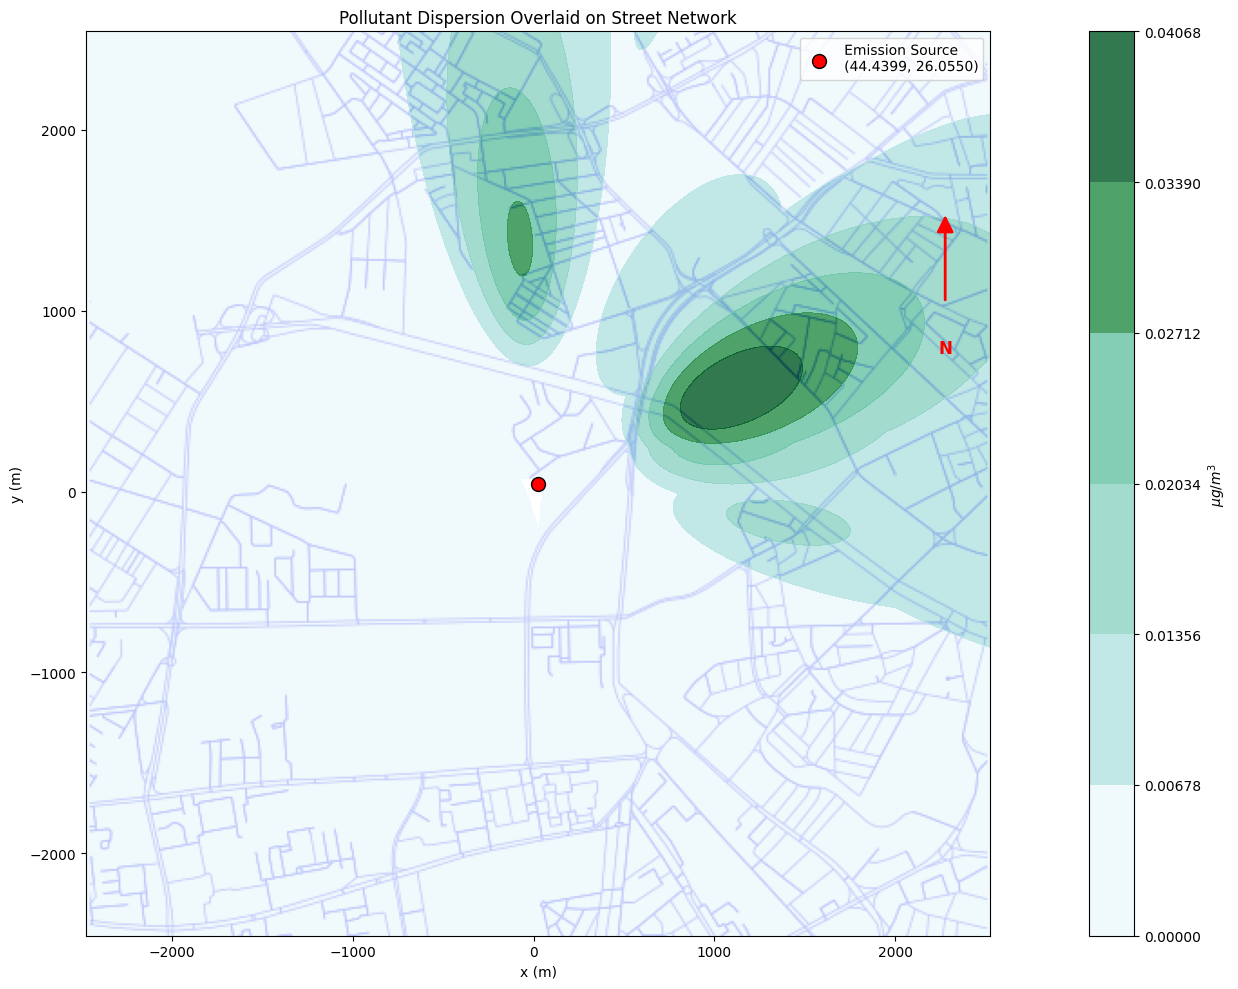

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from tqdm import tqdm
import pandas as pd


def calc_sigmas(CATEGORY,x1):
    # Your calc_sigmas function code here
    x=np.abs(x1)
    a=np.zeros(np.shape(x));
    b=np.zeros(np.shape(x));
    c=np.zeros(np.shape(x));
    d=np.zeros(np.shape(x));
    if CATEGORY == 1: # very unstable
        # vertical
        ind=np.where((x<100.) & (x>0.));
        a[ind]=122.800;b[ind]=0.94470;
        ind=np.where((x>=100.) & (x<150.));
        a[ind]=158.080;b[ind]=1.05420;
        ind=np.where((x>=150.) & (x<200.));
        a[ind]=170.220;b[ind]=1.09320;
        ind=np.where((x>=200.) & (x<250.));
        a[ind]=179.520;b[ind]=1.12620;
        ind=np.where((x>=250.) & (x<300.));
        a[ind]=217.410;b[ind]=1.26440;
        ind=np.where((x>=300.) & (x<400.));
        a[ind]=258.89;b[ind]=1.40940;
        ind=np.where((x>=400.) & (x<500.));
        a[ind]=346.75;b[ind]=1.7283;
        ind=np.where((x>=500.) & (x<3110.));
        a[ind]=453.85;b[ind]=2.1166;
        ind=np.where((x>=3110.));
        a[ind]=453.85;b[ind]=2.1166;
        # cross wind
        c[:]=24.1670;
        d[:]=2.5334;
    elif CATEGORY == 2: # moderately unstable
		# vertical
        ind=np.where((x<200.) & (x>0.));
        a[ind]=90.673;b[ind]=0.93198;
        ind=np.where((x>=200.) & (x<400.));
        a[ind]=98.483;b[ind]=0.98332;
        ind=np.where(x>=400.);
        a[ind]=109.3;b[ind]=1.09710;
        # cross wind
        c[:]=18.3330;
        d[:]=1.8096;
    elif CATEGORY == 3: # slightly unstable
        # vertical
        a[:]=61.141;
        b[:]=0.91465;
        # cross wind
        c[:]=12.5;
        d[:]=1.0857;
    elif CATEGORY == 4: # neutral
        # vertical
        ind=np.where((x<300.) &(x>0.));
        a[ind]=34.459;b[ind]=0.86974;
        ind=np.where((x>=300.) & (x<1000.));
        a[ind]=32.093;b[ind]=0.81066;
        ind=np.where((x>=1000.) & (x<3000.));
        a[ind]=32.093;b[ind]=0.64403;
        ind=np.where((x>=3000.) & (x<10000.));
        a[ind]=33.504;b[ind]=0.60486;
        ind=np.where((x>=10000.) & (x<30000.));
        a[ind]=36.650;b[ind]=0.56589;
        ind=np.where(x>=30000.);
        a[ind]=44.053;b[ind]=0.51179;
		# cross wind
        c[:]=8.3330;
        d[:]=0.72382;
    elif CATEGORY == 5: # moderately stable
        # vertical
        ind=np.where((x<100.) & (x>0.));
        a[ind]=24.26;b[ind]=0.83660;
        ind=np.where((x>=100.) & (x<300.));
        a[ind]=23.331;b[ind]=0.81956;
        ind=np.where((x>=300.) & (x<1000.));
        a[ind]=21.628;b[ind]=0.75660;
        ind=np.where((x>=1000.) & (x<2000.));
        a[ind]=21.628;b[ind]=0.63077;
        ind=np.where((x>=2000.) & (x<4000.));
        a[ind]=22.534;b[ind]=0.57154;
        ind=np.where((x>=4000.) & (x<10000.));
        a[ind]=24.703;b[ind]=0.50527;
        ind=np.where((x>=10000.) & (x<20000.));
        a[ind]=26.970;b[ind]=0.46713;
        ind=np.where((x>=20000.) & (x<40000.));
        a[ind]=35.420;b[ind]=0.37615;
        ind=np.where(x>=40000.);
        a[ind]=47.618;b[ind]=0.29592;
        # cross wind
        c[:]=6.25;
        d[:]=0.54287;
    elif CATEGORY == 6: # very stable
        # vertical
        ind=np.where((x<200.) & (x>0.));
        a[ind]=15.209;b[ind]=0.81558;
        ind=np.where((x>=200.) & (x<700.));
        a[ind]=14.457;b[ind]=0.78407;
        ind=np.where((x>=700.) & (x<1000.));
        a[ind]=13.953;b[ind]=0.68465;
        ind=np.where((x>=1000.) & (x<2000.));
        a[ind]=13.953;b[ind]=0.63227;
        ind=np.where((x>=2000.) & (x<3000.));
        a[ind]=14.823;b[ind]=0.54503;
        ind=np.where((x>=3000.) & (x<7000.));
        a[ind]=16.187;b[ind]=0.46490;
        ind=np.where((x>=7000.) & (x<15000.));
        a[ind]=17.836;b[ind]=0.41507;
        ind=np.where((x>=15000.) & (x<30000.));
        a[ind]=22.651;b[ind]=0.32681;
        ind=np.where((x>=30000.) & (x<60000.));
        a[ind]=27.074;b[ind]=0.27436;
        ind=np.where(x>=60000.);
        a[ind]=34.219;b[ind]=0.21716;
        # cross wind
        c[:]=4.1667;
        d[:]=0.36191;
    else:
        sys.exit()
    sig_z=a*(x/1000.)**b;
    sig_z[np.where(sig_z[:]>5000.)]=5000.;
    theta=0.017453293*(c-d*np.log(np.abs(x+1e-15)/1000.));
    sig_y=465.11628*x/1000.*np.tan(theta);
    # Printează valorile calculate
    print("sig_y:", sig_y)
    print("sig_z:", sig_z)
    return (sig_y,sig_z)


def gauss_func(Q, u, dir1, x, y, z, xs, ys, H_eff, Dy, Dz, STABILITY):
    u1 = u
    x1 = x - xs  # shift the coordinates so that stack is centre point
    y1 = y - ys
    # Components of u in x and y directions
    wx = u1 * np.sin((dir1 - 180.) * np.pi / 180.)
    wy = u1 * np.cos((dir1 - 180.) * np.pi / 180.)
    # Calculate angle and distances
    dot_product = wx * x1 + wy * y1
    magnitudes = u1 * np.sqrt(x1**2 + y1**2)
    subtended = np.arccos(dot_product / (magnitudes + 1e-15))
    downwind = np.cos(subtended) * magnitudes
    crosswind = np.sin(subtended) * magnitudes
    # Calculate sigmas based on stability and distance downwind
    sig_y, sig_z = calc_sigmas(STABILITY, downwind)
    C = np.zeros(x.shape)  # Ensure C has the correct shape
    # Get the indices where downwind > 0
    ind = downwind > 0
    # Apply the calculations only to these indices
    exp_part = np.exp(-crosswind[ind]**2 / (2 * sig_y[ind]**2))
    exp_z = (np.exp(-(z[ind] - H_eff)**2 / (2 * sig_z[ind]**2)) +
             np.exp(-(z[ind] + H_eff)**2 / (2 * sig_z[ind]**2)))
    C[ind] = Q / (2 * np.pi * u1 * sig_y[ind] * sig_z[ind]) * exp_part * exp_z
    print("Concentrația (C):", C)
    return C

print("Coloane disponibile în DataFrame:", df.columns)

# Presupunem un debit volumetric constant, de exemplu 1 m³/s
flow_rate = 5  # m³/s
T_stack = 150  # Temperatura gazelor de coș în °C

def calculate_plume_rise(T_stack, T_ambient, wind_speed, flow_rate, stack_diameter=0.5):
    T_stack_K = T_stack + 273.15  # Convertire la Kelvin
    T_ambient_K = T_ambient + 273.15
    delta_T = T_stack_K - T_ambient_K

    delta_H = stack_diameter * (flow_rate / wind_speed)**0.25 * (1 + (delta_T / T_stack_K))
    return delta_H



# # Funcția pentru estimarea stabilității atmosferice, presupunând că 'WS' este viteza vântului, iar 'TC' este temperatura
# def estimate_stability(row):
#     if row['WS'] > 4.5:
#         return 6  # Very stable
#     elif row['WS'] > 3.5:
#         return 5  # Moderately stable
#     elif row['RAD'] > 200 and row['TC'] > 20:
#         return 4  # Neutral due to high solar radiation but warmer temperatures
#     elif row['RAD'] > 120 and row['TC'] > 15:
#         return 3  # Slightly unstable due to moderate solar radiation and moderate temperatures
#     elif row['RAD'] > 50:
#         return 2  # Moderately unstable due to lower solar radiation, potentially early morning or late afternoon
#     else:
#         return 1  # Very unstable, low solar radiation typically indicating night or very cloudy conditions

def estimate_stability(row):
    if row['WS'] > 4.5:
        return 6  # Very stable
    elif row['WS'] > 3.5:
        return 5  # Moderately stable
    elif row['RAD'] > 200 and row['TC'] > 20:
        return 4  # Neutral due to high solar radiation but warmer temperatures
    elif row['RAD'] > 120 and row['TC'] > 15:
        return 3  # Slightly unstable due to moderate solar radiation and moderate temperatures
    elif row['RAD'] > 50:
        return 2  # Moderately unstable due to lower solar radiation, potentially early morning or late afternoon
    elif row['RH'] > 75:
        return 1  # Very unstable due to high relative humidity
    else:
        return 1  # Default to very unstable if none of the above conditions are met


# # Funcția pentru suprapunerea pe harta stradală
# def overlay_on_map(x, y, C1, image_data, save_path=None):
#     plt.figure(figsize=(20, 10))
#     plt.imshow(image_data, extent=extent, alpha=0.5)
#     # Utilizăm extinderea determinată pentru a plasa corect harta rețelei stradale
#     plt.imshow(image_data, extent=extent, alpha=0.5)
#     cs = plt.contourf(x, y, np.mean(C1, axis=2) * 1e6, levels=np.linspace(0, C1.max(), 20), cmap='Oranges', alpha=0.2)
#     cbar = plt.colorbar(cs)
#     cbar.set_label(r'$\mu g / m^{-3}$')
#     plt.xlabel('x (m)')
#     plt.ylabel('y (m)')
#     plt.title('Pollutant Dispersion Overlaid on Street Network')
#     if save_path:
#         plt.savefig(save_path, format='png', dpi=100)
#         print(f"Extent pentru suprapunere: {extent}")
#     else:
#         print(f"Extent pentru suprapunere: {extent}")
#         plt.show()

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patheffects import withStroke
from matplotlib.patches import FancyArrowPatch


def overlay_on_map(x, y, C1, image_data, center_coords, save_path=None):
    plt.figure(figsize=(20, 10))

    # # Calculăm valorile medii și pragurile pentru C1
    # C1_mean = np.mean(C1, axis=2) * 1e6  # Conversie la micrograme per metru cub
    # min_val, max_val = np.min(C1_mean), np.max(C1_mean)
    # thresholds = [min_val, min_val + (max_val - min_val) / 3, min_val + 2 * (max_val - min_val) / 3, max_val]

    # Folosim valorile maxime în loc de medie pentru fiecare oră
    C1_max = np.max(C1, axis=2) * 1e6  # Conversie la micrograme per metru cub
    max_val = np.max(C1_max)
    min_val = np.min(C1_max[C1_max > 0])  # Ignorăm zero pentru a nu distorsiona scala de culori

    # Pragurile pentru afișarea pe harta de dispersie
    # Creăm cinci praguri între valoarea minimă și cea maximă
    thresholds = [min_val,
                  min_val + (max_val - min_val) / 6,
                  min_val + 2 * (max_val - min_val) / 6,
                  min_val + 3 * (max_val - min_val) / 6,
                  min_val + 4 * (max_val - min_val) / 6,
                  min_val + 5 * (max_val - min_val) / 6,
                  max_val]

    # Definim colormap-ul personalizat
    cmap = mcolors.ListedColormap(['#edf8fb', '#b2e2e2', '#8cd2c3', '#66c2a4', '#238b45', '#005824'])

    # Plasăm harta rețelei stradale
    plt.imshow(image_data, extent=[x.min(), x.max(), y.min(), y.max()], alpha=1.00)

    # Creăm conturul cu nivelele specificate și colormap-ul personalizat
    cs = plt.contourf(x, y, C1_max, levels=thresholds, cmap=cmap, alpha=0.8)
    cbar = plt.colorbar(cs, ticks=thresholds)
    cbar.set_label(r'$\mu g / m^{3}$')

   # Adăugăm un pin pentru centrul hărții și afișăm coordonatele
    plt.scatter(*center_coords, color='red', s=100, label=f'Emission Source\n({center_coords[1]:.4f}, {center_coords[0]:.4f})', edgecolors='black', zorder=5)

    # Afișăm legenda cu efect de contur pentru a crește lizibilitatea
    plt.legend(prop={'size': 10}, loc='upper right').get_frame().set_alpha(0.9)
    for text in plt.legend().get_texts():
        text.set_path_effects([withStroke(linewidth=3, foreground='white')])

    # Adăugăm un indicator pentru Nord
    north_arrow_length = 0.1 * (plt.ylim()[1] - plt.ylim()[0])
    arrow_style = FancyArrowPatch((plt.xlim()[1] - north_arrow_length / 2, plt.ylim()[1] - north_arrow_length * 3),
                                  (plt.xlim()[1] - north_arrow_length / 2, plt.ylim()[1] - north_arrow_length * 2),
                                  color='red', arrowstyle='-|>', mutation_scale=25, linewidth=2)
    plt.gca().add_patch(arrow_style)
    plt.text(plt.xlim()[1] - north_arrow_length / 2, plt.ylim()[1] - north_arrow_length * 3.5, 'N',
             horizontalalignment='center', verticalalignment='center', fontsize=12, fontweight='bold', color='red')

    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title('Pollutant Dispersion Overlaid on Street Network')

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, format='png', dpi=100, bbox_inches='tight', pad_inches=0)
        print(f"Saved overlay image to {save_path}")
    else:
        plt.show()


# Load necessary data
mat_contents = loadmat('/content/ReteauaStradala.mat')
street_network_image = mat_contents['A']
emission_source_x = mat_contents['emission_source_x'][0][0]  # Assuming this is correctly provided as the center
emission_source_y = mat_contents['emission_source_y'][0][0]  # Assuming this is correctly provided as the center

# Define the emission source height and diffusion coefficients
H = 25  # Height of the emission source in meters
Dy = 10  # Diffusion coefficient in the y-direction
Dz = 10  # Diffusion coefficient in the z-direction

# Define grid resolution
dxy = 10  # Grid spacing in meters

# Create simulation grid
x_range = np.linspace(emission_source_x - 2500, emission_source_x + 2500, 500)
y_range = np.linspace(emission_source_y - 2500, emission_source_y + 2500, 500)


print(f"Rezoluția grilei (dxy): {dxy}")
print(f"Dimensiunea grilei: {len(x_range)}x{len(y_range)}")
x, y = np.meshgrid(x_range, y_range)


# Extinderea este calculată pe baza grilei de dispersie
x_min, x_max = np.min(x), np.max(x)
y_min, y_max = np.min(y), np.max(y)
extent = [x_min, x_max, y_min, y_max]


# Inițializăm DataFrame-ul cu datele necesare
# df = pd.DataFrame({
#     "Time": pd.date_range("2023-07-17 00:00", periods=24, freq='H'),
#     "RH": [65.68, 70, 72.73, 75.07, 69.47, 58.89, 51.1, 46.44, 41.02, 35.76, 33.26, 32.76, 32.17, 31.73, 32.69, 34.06, 35.27, 39.56, 45.95, 46.25, 52.12, 54.68, 57.32, 58.74],
#     "TC": [23.01, 21.97, 21.2, 21.03, 23.26, 26.52, 29.82, 32.33, 34.69, 37.16, 38.34, 38.45, 38.61, 38.16, 36.48, 35.81, 34.8, 32.25, 30.27, 30.84, 28.74, 27.62, 26.49, 25.79],
#     "WD": [70.91, 70.91, 70.9, 70.91, 70.83, 70.83, 50.1, 242.71, 137.74, 157.93, 80.85, 146.77, 175.06, 309.03, 8.67, 6.98, 223.43, 274.78, 280.65, 243.65, 219.07, 322.56, 316.16, 316.01],
#     "WS": [0.11, 0.11, 0.11, 0.11, 3.11, 0.12, 0.13, 0.19, 0.19, 0.24, 0.25, 0.27, 0.29, 0.16, 0.13, 0.12, 0.13, 0.13, 0.12, 0.17, 0.12, 0.12, 0.12, 0.12],
#     "S1": [17.06, 15.19, 34.14, 43.12, 30.21, 36.39, 41.02, 33.42, 29.36, 36.16, 128.46, 42.12, 50.53, 58.94, 44.62, 26.17, 90.71, 256.10, 144.29, 20.24, 62.01, 41.82, 26.24, 45.18],
#     # S2 și S3 eliminate pentru că vom utiliza doar S1
# })
df['Stability'] = df.apply(estimate_stability, axis=1)  # Estimăm stabilitatea folosind funcția definită mai jos



# Apoi convertim valorile S1 la rata de emisie în g/s
# Deoarece S1 este în µg/m³, împărțim la 10^6 pentru a converti în g/m³ și înmulțim cu flow_rate pentru a ajunge la g/s
df['Q'] = (df['S1'] ) / 1e6
print(df)

# Apoi folosim această rată de emisie în modelul gauss_func
# Inițializăm matricea de concentrație pentru 24 de ore
x_dim = len(x_range)
y_dim = len(y_range)
C1 = np.zeros((y_dim, x_dim, 24))



for i in tqdm(range(24)):
    wind_dir = df.loc[i, 'WD']
    wind_speed = df.loc[i, 'WS']
    T_ambient = df.loc[i, 'TC']  # Temperatura ambientală din DataFrame
    stability = df.loc[i, 'Stability']

    # Calculăm H_eff pentru fiecare oră
    H_eff = H + calculate_plume_rise(T_stack, T_ambient, wind_speed, flow_rate)
    # Utilizăm rata de emisie Q pentru emisie
    C = gauss_func(df.loc[i, 'Q'], wind_speed, wind_dir, x, y, np.zeros((y_dim, x_dim)),
                   emission_source_x, emission_source_y, H_eff, Dy, Dz, stability)
    C1[:, :, i] = C
    print(f"Iteration {i}, Wind Direction: {wind_dir}, Wind Speed: {wind_speed}, Effective Stack Height: {H_eff}")


# Dupa rularea modelului și calculul lui C1, afișăm rezultatele
overlay_on_map(x, y, C1, street_network_image, center_coords=(center_longitude, center_latitude), save_path='/content/ModelDispersie.png')
# # Print the grid range for x and y
# print("x_range:", x_range)
# print("y_range:", y_range)

# Calculate the grid extents
grid_extent_x = [x_range.min(), x_range.max()]
grid_extent_y = [y_range.min(), y_range.max()]
print("Grid extent for x:", grid_extent_x)
print("Grid extent for y:", grid_extent_y)

# Print the extent used for the overlay
print("Overlay extent:", extent)

# Check if the extents match
match_x = (round(grid_extent_x[0], 2) == round(extent[0], 2)) and (round(grid_extent_x[1], 2) == round(extent[1], 2))
match_y = (round(grid_extent_y[0], 2) == round(extent[2], 2)) and (round(grid_extent_y[1], 2) == round(extent[3], 2))

print("Do the grid extents match the overlay extents? (x, y):", (match_x, match_y))


Foarte Stabil (6): Viteze mari ale vântului sugerează adesea condiții mai turbulente, dar stabilizate mecanic.
Moderat Stabil (5): Viteze ale vântului ușor mai scăzute, dar încă suficiente pentru amestecare mecanică.
Neutru (4): Această categorie ia acum în considerare atât temperatura, cât și radiația solară ridicată, care poate nega unele efecte de instabilitate prin încălzirea uniformă a suprafeței.
Ușor Instabil (3): Radiația solară moderată împreună cu temperaturi moderate sugerează potențialul pentru o oarecare instabilitate termică.
Moderat Instabil (2): Radiație solară scăzută care poate apărea în timpul dimineților sau după-amiezelor târzii, când influența soarelui este redusă, crescând probabilitatea de instabilitate.
Foarte Instabil (1): Radiație solară foarte scăzută, indicativă pentru condiții nocturne sau foarte înnorate, ce pot duce la răcirea semnificativă a suprafeței și, astfel, la condiții mai instabile.

##printuri

In [ ]:
# Assuming C1 is the 3D concentration array resulting from the model
max_concentration = np.max(C1)
min_concentration = np.min(C1)
print("Max concentration:", max_concentration)
print("Min concentration:", min_concentration)


Max concentration: 4.5235160331374065e-08
Min concentration: 0.0


In [ ]:
# Check if the grid resolution is appropriate
print("Grid resolution (dxy):", dxy)
print("Grid shape:", x.shape)


Grid resolution (dxy): 10
Grid shape: (500, 500)


##cod salvare metadate

In [ ]:
import os
import shutil
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from datetime import datetime
import pytz
from google.colab import files
# Setăm fusul orar pentru România
bucharest_timezone = pytz.timezone('Europe/Bucharest')
# Obținem data și ora curentă în acest fus orar
current_time = datetime.now(bucharest_timezone)
folder_name = current_time.strftime("%d%m%Y_%H%M")
metadata_file_name = "metadata.txt"

# Creăm calea folderului și a fișierului
folder_path = os.path.join("/content", folder_name)
metadata_file_path = os.path.join(folder_path, metadata_file_name)

# Creăm folderul dacă nu există
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Salvăm metadatele în fișierul text
with open(metadata_file_path, 'w') as file:
    file.write(f"Data generării modelului: {current_time.strftime('%d/%m/%Y %H:%M')}\n")
    file.write(f"Emission source location (x, y): ({emission_source_x}, {emission_source_y})\n")
    file.write(f"Height of emission source (H): {H} meters\n")
    file.write(f"Diffusion coefficient (Dy): {Dy}\n")
    file.write(f"Diffusion coefficient (Dz): {Dz}\n")
    file.write(f"Grid spacing (dxy): {dxy} meters\n")
    file.write(f"Flow rate: {flow_rate} m³/s\n")
    # Presupunem că ai datele C1 deja calculate și încărcate
    file.write(f"Max concentration: {np.max(C1)}\n")
    file.write(f"Min concentration: {np.min(C1)}\n")
    file.write(f"Grid extent for x: {grid_extent_x}\n")
    file.write(f"Grid extent for y: {grid_extent_y}\n")
    file.write(f"Overlay extent: {extent}\n")
    file.write(f"Do the grid extents match the overlay extents? (x, y): {(match_x, match_y)}\n")

# Încărcăm și salvăm imaginea rețelei stradale din fișierul .mat
mat_file_path_street_network = "/content/ReteauaStradala.mat"
mat_contents = loadmat(mat_file_path_street_network)
street_network_image = mat_contents['A']
street_image_path = os.path.join(folder_path, "ReteauaStradala.png")
plt.imsave(street_image_path, street_network_image)

# Copiem imaginile de basemap și modelul suprapus din locațiile temporare
temp_basemap_image_path = "/content/SuprapunereBasemap.png"
temp_overlay_image_path = "/content/ModelDispersie.png"
basemap_image_path = os.path.join(folder_path, "SuprapunereBasemap.png")
overlay_image_path = os.path.join(folder_path, "ModelDispersie.png")

# Folosim shutil pentru a copia fișierele
shutil.copy(temp_basemap_image_path, basemap_image_path)
shutil.copy(temp_overlay_image_path, overlay_image_path)

print(f"Metadata and images saved in the folder: {folder_path}")
# Creăm un arhivă zip din folderul cu datele noastre
shutil.make_archive(folder_name, 'zip', folder_path)
# Descărcăm arhiva
files.download(f"{folder_name}.zip")

Metadata and images saved in the folder: /content/13062024_1231


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##achizita datelor mqtt

In [ ]:
!pip install paho-mqtt==1.5.1
!pip show paho-mqtt

import paho.mqtt.client as mqtt

def on_connect(client, userdata, flags, rc):
    print("Connected with result code "+str(rc))

def on_message(client, userdata, msg):
    print(msg.topic+" "+str(msg.payload))

client = mqtt.Client(client_id="Python_Client")
client.on_connect = on_connect
client.on_message = on_message

client.connect("mqtt.beia-telemetrie.ro", 1883, 60)

# Subscribing in on_connect() means that if we lose the connection and
# reconnect then subscriptions will be renewed.
client.subscribe("telecontact.adcon.TC1.WS")
client.subscribe("telecontact.adcon.TC1.WD")
client.subscribe("telecontact.adcon.TC1.TC")
client.subscribe("telecontact.adcon.TC1.RAD")
client.subscribe("telecontact.adcon.TC1.RH")
client.subscribe("meshlium3d4c/DDNI/PM10")

# Blocking call that processes network traffic, dispatches callbacks and
# handles reconnecting.
# Other loop*() functions are available that give a threaded interface and a
# manual interface.
client.loop_forever()


##interogare date influx
SELECT mean("value") as "WS" FROM /mqtt.telecontact.adcon.TC1.WS./ WHERE time >= now() - 7d GROUP BY time(1h) fill(none)



##Parsare Date din xlsx

In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('/content/DateSenzori.xlsx')

# Save the DataFrame to a text file with specific formatting
with open('/content/DataOutput.txt', 'w') as f:
    # Write the headers
    f.write('\t'.join(df.columns) + '\n')

    # Write the data rows
    for index, row in df.iterrows():
        f.write(f"{row['Timestamp']}\t{row['WS']:.2f}\t{row['WD']:.2f}\t{row['TC']:.2f}\t{row['RH']:.2f}\t{row['RAD']:.2f}\t{row['S1']:.2f}\n")

print("Data has been saved to DataOutput.txt")


Data has been saved to DataOutput.txt


##Creare df din txt file

In [ ]:
import pandas as pd

# Load the data from the text file
df_full = pd.read_csv('/content/DataOutput.txt', sep='\t', parse_dates=['Timestamp'], dayfirst=True)

# Select the last 24 rows
df = df_full.iloc[-24:].copy()

# Rename the 'PM10' column to 'S1' and 'Timestamp' to 'Time'
df.rename(columns={'PM10': 'S1', 'Timestamp': 'Time'}, inplace=True)

# Ensure the columns are in the desired order
df = df[['Time', 'RH', 'TC', 'WD', 'WS', 'RAD', 'S1']]

# Reset the index for clean DataFrame formatting
df.reset_index(drop=True, inplace=True)

# Print the DataFrame to confirm it looks correct
print(df)


                  Time     RH     TC      WD    WS     RAD     S1
0  2024-11-06 20:00:00  53.67  25.76  244.70  0.12    0.82  13.14
1  2024-11-06 21:00:00  63.18  23.27  244.77  0.12    0.81   5.98
2  2024-11-06 22:00:00  62.50  22.73  244.78  0.12    0.81   5.20
3  2024-11-06 23:00:00  69.49  21.31  244.78  0.12    0.78   4.14
4  2024-12-06 00:00:00  73.56  20.80  244.79  0.12    0.75   3.51
5  2024-12-06 01:00:00  77.42  20.37  244.79  0.12    0.78   5.75
6  2024-12-06 02:00:00  81.10  19.35  244.79  0.12    2.69  12.20
7  2024-12-06 03:00:00  77.15  19.82  244.80  0.12   19.34  27.19
8  2024-12-06 04:00:00  64.19  23.14  217.14  0.13   42.84   9.30
9  2024-12-06 05:00:00  60.89  25.19   65.43  0.13  349.18   4.63
10 2024-12-06 06:00:00  53.51  27.65  267.19  0.16  505.83   9.98
11 2024-12-06 07:00:00  47.24  30.34  168.40  0.16  614.40  11.81
12 2024-12-06 08:00:00  43.54  31.64  275.08  0.19  711.02  12.97
13 2024-12-06 09:00:00  39.42  33.17  288.02  0.19  753.10   8.47
14 2024-12

In [ ]:
import pandas as pd

# Load the data
file_path = '/content/DateSenzori.xlsx'
df = pd.read_excel(file_path)

# Advanced styling with multiple conditions
styled_df = (df.style
    .set_caption(" DataFrame - Sensor Data")
    .background_gradient(subset=['RH'], cmap='Blues')
    .applymap(lambda x: 'color: green' if x > 0.1 else 'color: red', subset=['WS'])
    .applymap(lambda x: 'font-weight: bold' if x > 0.1 else '', subset=['WS'])
)

# Display the styled DataFrame
styled_df


,Timestamp,WS,WD,TC,RH,RAD,S1
0,2024-06-11 20:00:00,0.120000,244.700000,25.760000,53.670000,0.820000,13.140000
1,2024-06-11 21:00:00,0.120000,244.770000,23.270000,63.180000,0.810000,5.980000
2,2024-06-11 22:00:00,0.120000,244.780000,22.730000,62.500000,0.810000,5.200000
3,2024-06-11 23:00:00,0.120000,244.780000,21.310000,69.490000,0.780000,4.140000
4,2024-06-12 00:00:00,0.120000,244.790000,20.800000,73.560000,0.750000,3.510000
5,2024-06-12 01:00:00,0.120000,244.790000,20.370000,77.420000,0.780000,5.750000
6,2024-06-12 02:00:00,0.120000,244.790000,19.350000,81.100000,2.690000,12.200000
7,2024-06-12 03:00:00,0.120000,244.800000,19.820000,77.150000,19.340000,27.190000
8,2024-06-12 04:00:00,0.130000,217.140000,23.140000,64.190000,42.840000,9.300000
9,2024-06-12 05:00:00,0.130000,65.430000,25.190000,60.890000,349.180000,4.630000


In [ ]:
# Calculating the intermediate color value between '#b2e2e2' and '#66c2a4'
color_b2e2e2 = mcolors.to_rgba('#b2e2e2')
color_66c2a4 = mcolors.to_rgba('#66c2a4')
color_intermediate = mcolors.to_hex((np.array(color_b2e2e2) + np.array(color_66c2a4)) / 2)
color_intermediate


'#8cd2c3'

##WCC concentration based on https://www.eng.uwo.ca/people/esavory/gaussian%20plumes.pdf

In [ ]:
def calculate_worst_case_concentration(Q, U, T, H_wc, W_wc):
    """
    Calculate the worst-case concentration downwind of a point source using the provided equation.

    Args:
    - Q: Source strength or emission rate in micrograms per kilogram (μg/kg).
    - U: Wind speed at a reference height in meters per second (m/s).
    - T: Time in seconds over which the emission rate is averaged.
    - H_wc: Effective release height in meters (m).
    - W_wc: Width of the area in meters (m) over which the pollutant is dispersed.

    Returns:
    - C_wc: Worst case concentration in micrograms per cubic meter (μg/m^3).
    """
    # Calculation of worst-case concentration
    C_wc = (10**9 * Q * (1 / T)) / (U * H_wc * W_wc)

    return C_wc

# Example usage:
Q_example = 1  # Example source strength or emission rate in μg/kg (since the rate is already given per kg, we don't need 10^9 conversion factor)
U_example = 1  # Example wind speed at a reference height [m/s]
T_example = 1800  # Time in seconds
H_wc_example = 50  # Effective release height [m]
W_wc_example = 500  # Width of the area [m]

worst_case_concentration = calculate_worst_case_concentration(Q_example, U_example, T_example, H_wc_example, W_wc_example)
print("Worst case concentration:", worst_case_concentration, "μg/m^3")


Worst case concentration: 22.22222222222222 μg/m^3


In [ ]:
import pandas as pd

# Assuming df is your DataFrame with columns 'Q_g_per_s' and 'WS'
# and the function calculate_worst_case_concentration is defined as before

# Find max values in the DataFrame
max_Q = df['Q'].max() * 10**3  # Convert from g/s to μg/kg
print(max_Q)
max_U = df['WS'].max()
print(max_U)
# Constants
T = 3600*24  # Time in seconds
H_wc = 25  # Effective release height [m]
W_wc = 2500  # Width of the area [m]

# Calculate the worst-case concentration using max values from the DataFrame
worst_case_concentration = calculate_worst_case_concentration(max_Q, max_U, T, H_wc, W_wc)
print("Worst case concentration using max Q and U from DataFrame:", worst_case_concentration, "μg/m^3")


In [ ]:
import pandas as pd

def format_column_as_year(df, column_name):
    if pd.api.types.is_numeric_dtype(df[column_name]):
        df[column_name] = df[column_name].apply(lambda x: f"{int(x):.0f}" if not pd.isnull(x) else x)

def round_decimals(df, column_name):
    if pd.api.types.is_float_dtype(df[column_name]):
        df[column_name] = df[column_name].round(2)

def adjust_alignment(df, alignment_dict):
    # Adjust column alignment based on a dictionary specifying alignments
    for column, alignment in alignment_dict.items():
        if column in df.columns:
            max_width = df[column].astype(str).str.len().max()
            if alignment == 'center':
                df[column] = df[column].astype(str).apply(lambda x: x.center(max_width))
            elif alignment == 'right':
                df[column] = df[column].astype(str).apply(lambda x: x.rjust(max_width))
            else:  # default to left if unspecified
                df[column] = df[column].astype(str).apply(lambda x: x.ljust(max_width))

def format_to_txt(df, filename):
    # Write to text file ensuring each line is properly formatted
    with open(filename, 'w', encoding='utf-8') as file:
        data_string = df.to_string(index=False, header=True, justify='left')
        file.write(data_string)

# Load the Excel file
excel_file = '/content/Registrul Poluantilor emisi si transferati - complexe industriale.xlsx'

# Read the first three sheets
sheet1 = pd.read_excel(excel_file, sheet_name=0)
sheet2 = pd.read_excel(excel_file, sheet_name=1)
sheet3 = pd.read_excel(excel_file, sheet_name=2)

# Format 'An raportare' columns as years without decimals
for column in ['An raportare']:
    if column in sheet1.columns:
        format_column_as_year(sheet1, column)
    if column in sheet2.columns:
        format_column_as_year(sheet2, column)
    if column in sheet3.columns:
        format_column_as_year(sheet3, column)

# Round decimal columns in sheet3
for column in ['PM2.5', 'PM10']:
    if column in sheet3.columns:
        round_decimals(sheet3, column)

# Specify alignment settings for each sheet
alignments_sheet1 = {'Județ': 'left', 'Cod activitate': 'right'}
alignments_sheet2 = {'An raportare': 'right', 'Județ': 'left', 'Sector activitate': 'left'}
alignments_sheet3 = {'Categorie': 'right', 'PM2.5': 'right', 'PM10': 'right'}

# Apply alignment adjustments
adjust_alignment(sheet1, alignments_sheet1)
adjust_alignment(sheet2, alignments_sheet2)
adjust_alignment(sheet3, alignments_sheet3)

# Save each formatted sheet to a text file
format_to_txt(sheet1, 'Sheet1.txt')
format_to_txt(sheet2, 'Sheet2.txt')
format_to_txt(sheet3, 'Sheet3.txt')


In [ ]:
import pandas as pd

def reshape_for_printing(df, rows_per_page):
    num_triples = 3  # As you want up to 9 columns, which makes 3 groups of three

    # Calculate total sets needed
    total_sets = (len(df) // rows_per_page) + (1 if len(df) % rows_per_page != 0 else 0)

    # Initialize an empty DataFrame to store the reshaped data
    combined_df = pd.DataFrame()

    # Iterate over the number of sets required to fill the data into pages
    for set_number in range(total_sets):
        start_idx = set_number * rows_per_page
        end_idx = start_idx + rows_per_page
        subset = df.iloc[start_idx:end_idx]

        # Ensure the subset has the correct number of rows
        if subset.shape[0] < rows_per_page:
            # Create an empty DataFrame to fill the missing rows
            extra_rows = rows_per_page - subset.shape[0]
            empty_df = pd.DataFrame(index=range(extra_rows), columns=subset.columns)
            subset = pd.concat([subset, empty_df], axis=0).reset_index(drop=True)

        # Concatenate subsets horizontally
        if set_number % num_triples == 0 and set_number != 0:
            combined_df = pd.concat([combined_df, pd.DataFrame(columns=range(3))], axis=1)  # Add spacer columns
        combined_df = pd.concat([combined_df, subset.reset_index(drop=True)], axis=1)

    return combined_df

# Load data from Sheet1.txt
df = pd.read_csv('Sheet1.txt', delimiter='\t')

# Assuming 6 rows fit per page
reshaped_df = reshape_for_printing(df, 30)

# Save the reshaped DataFrame to a new txt file
reshaped_df.to_csv('Sheet1_reshaped.txt', index=False, sep='\t', header=False)


##mapData

In [ ]:
!pip install pandas folium branca


In [ ]:
import openpyxl
import pandas as pd

# Load the workbook
workbook = openpyxl.load_workbook('/content/test.xlsx')
sheet = workbook.active

# Convert the sheet to a DataFrame
data = pd.DataFrame(sheet.values)
print(data)

          0          1          2     3       4
0    Sector  Longitude   Latitude  Year   Value
1         1  26.077778  44.947221  2007  303000
2         1  26.077778  44.947221  2008  277000
3         1  26.077778  44.947221  2009  239000
4         1  26.077778  44.947221  2010  301000
..      ...        ...        ...   ...     ...
272       7  25.947777  43.950555  2014   65300
273       7  25.947777  43.950555  2015   64300
274       7  23.626522  46.124211  2008   64000
275       8  26.877526  44.433213  2020   56500
276       8  26.877526  44.433213  2022   94100

[277 rows x 5 columns]


In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Încărcarea datelor
data = pd.read_excel('/content/test.xlsx')

# Funcție pentru crearea hărții
def create_heatmap(filtered_data, min_val, max_val):
    # Creare harta folosind coordonatele centrale ale datelor
    map_center = [filtered_data['Latitude'].mean(), filtered_data['Longitude'].mean()]
    m = folium.Map(location=map_center, zoom_start=12)

    # Creare heatmap
    heatmap_data = [[row['Latitude'], row['Longitude'], row['Value']] for index, row in filtered_data.iterrows()]
    HeatMap(heatmap_data, min_opacity=0.2, max_val=max_val, radius=20, blur=15, max_zoom=1).add_to(m)

    return m

# Funcție pentru filtrarea datelor și crearea heatmap
def generate_map(sector, year):
    # Filtrare date după sector și an
    filtered_data = data[(data['Sector'] == sector) & (data['Year'] == year)]

    # Determinare valori minime și maxime pentru setarea scalei de culori
    min_val = filtered_data['Value'].min()
    max_val = filtered_data['Value'].max()

    # Crearea hărții
    return create_heatmap(filtered_data, min_val, max_val)

# Exemplu de utilizare
sector = 1  # Sectorul dorit
year = 2017  # Anul dorit
map_instance = generate_map(sector, year)
map_instance.save('heatmap.html')  # Salvarea hărții într-un fișier HTML


<ipython-input-14-755a9c415f2d>:16: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heatmap_data, min_opacity=0.2, max_val=max_val, radius=20, blur=15, max_zoom=1).add_to(m)


In [ ]:
!pip install folium
import folium
from folium import plugins
import pandas as pd
import numpy as np
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact, interactive


In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from IPython.display import display, clear_output
import ipywidgets as widgets

# Încărcarea datelor
file_path = 'test.xlsx'  # Modify with the actual path
data = pd.read_excel(file_path)

# Verificare date
print(data.head())

# Functia de generare a harti
def plot_map(data, year, sector):
    clear_output(wait=True)  # Clears the previous output
    # Create a map centered around Romania with adjusted zoom and size
    m = folium.Map(location=[45.9432, 24.9668], zoom_start=7, width='75%', height='75%')  # Adjust size here

    # Filter data according to selections
    filtered_data = data[(data['Year'] == year) & (data['Sector'].isin([sector] if sector != 'All' else data['Sector'].unique()))]
    # Generate heatmap
    hm_data = filtered_data[['Latitude', 'Longitude', 'Value']].values.tolist()
    HeatMap(hm_data).add_to(m)

    return m

# Widget for selecting the year
year_slider = widgets.SelectionSlider(
    options=sorted(data['Year'].unique()),
    description='Year',
    continuous_update=False
)

# Widget for selecting the sector
sector_dropdown = widgets.Dropdown(
    options=['All'] + sorted(data['Sector'].unique()),
    description='Sector',
    value='All'
)

def update_map(year, sector):
    m = plot_map(data, year, sector)
    display(m)

out = widgets.interactive_output(update_map, {'year': year_slider, 'sector': sector_dropdown})
display(widgets.VBox([year_slider, sector_dropdown, out]))

# Function for running the timelapse
def run_timelapse():
    years = sorted(data['Year'].unique())
    for year in years:
        year_slider.value = year
        sleep(1)  # Pause of 1 second between years

# Button for timelapse control
timelapse_button = widgets.Button(description="Play Timelapse")
timelapse_button.on_click(lambda b: run_timelapse())

# Display the button and the map
display(widgets.VBox([timelapse_button, year_slider, sector_dropdown, out]))


In [ ]:
!pip install --upgrade pyngrok


In [ ]:
# # Pasul 1: Creează directorul templates dacă nu există
# !mkdir -p /content/templates

# # Pasul 2: Instalare Flask-ngrok și alte dependențe necesare
# !pip install flask-ngrok pandas folium

# Importul bibliotecilor necesare
from flask import Flask, render_template, request
from folium.plugins import HeatMap
import folium
import pandas as pd
from pyngrok import ngrok

# Încărcarea și preprocesarea datelor
data = pd.read_excel('/content/test.xlsx')
data['Year'] = data['Year'].astype(str)

# Configurarea aplicației Flask
app = Flask(__name__)

# Definirea rutei pentru pagina principală
@app.route("/")
def home():
    year = request.args.get('year', data['Year'].min())
    sector = request.args.get('sector', 'All')

    if sector != 'All':
        filtered_data = data[(data['Year'] == year) & (data['Sector'] == sector)]
    else:
        filtered_data = data[data['Year'] == year]

    m = folium.Map(location=[45.9432, 24.9668], zoom_start=7)
    if not filtered_data.empty:
        hm_data = filtered_data[['Latitude', 'Longitude', 'Value']].values.tolist()
        HeatMap(hm_data).add_to(m)

    map_file = f'map_{year}_{sector}.html'
    m.save(f'/content/templates/{map_file}')
    return render_template(map_file)

if __name__ == "__main__":
    # Set up ngrok
    ngrok.set_auth_token('2cG2rxJFIVn5C7WH1QJjo1wzJML_t9S5469X8q9E9VeEZbhP')
    public_url = ngrok.connect(8000)
    print('Public URL:', public_url)

    # Configurare Flask pentru a rula pe portul 8000
    app.run(port=8000)


In [ ]:
# # Pasul 1: Creează directorul templates dacă nu există
# !mkdir -p /content/templates

# # Pasul 2: Instalare Flask-ngrok și alte dependențe necesare
# !pip install flask-ngrok pandas folium

# Importul bibliotecilor necesare
from flask import Flask, render_template, request, jsonify
from folium.plugins import HeatMap
import folium
import pandas as pd
from pyngrok import ngrok

# Încărcarea și preprocesarea datelor
data = pd.read_excel('/content/test.xlsx')
data['Year'] = data['Year'].astype(str)  # Converting years to string

# Configurarea aplicației Flask
app = Flask(__name__)

# Salvăm hărțile pentru toate combinațiile posibile de ani și sectoare
def pregenerate_maps():
    for year in data['Year'].unique():
        for sector in ['All'] + list(data['Sector'].unique()):
            filtered_data = data[(data['Year'] == year) & (data['Sector'] == sector if sector != 'All' else True)]
            m = folium.Map(location=[45.9432, 24.9668], zoom_start=7)
            if not filtered_data.empty:
                hm_data = filtered_data[['Latitude', 'Longitude', 'Value']].values.tolist()
                HeatMap(hm_data).add_to(m)
            map_file = f'map_{year}_{sector}.html'
            m.save(f'/content/templates/{map_file}')

# Apelăm funcția pentru a genera toate hărțile la startup
pregenerate_maps()

@app.route("/")
def home():
    # Se oferă opțiuni pentru selector
    years = sorted(data['Year'].unique())
    sectors = ['All'] + sorted(data['Sector'].unique())
    return render_template('index.html', years=years, sectors=sectors)

@app.route("/map")
def map():
    year = request.args.get('year', data['Year'].min())
    sector = request.args.get('sector', 'All')
    map_file = f'map_{year}_{sector}.html'
    return render_template(map_file)

if __name__ == "__main__":
    # Set up ngrok
    ngrok.set_auth_token('2cG2rxJFIVn5C7WH1QJjo1wzJML_t9S5469X8q9E9VeEZbhP')
    public_url = ngrok.connect(8000)
    print('Public URL:', public_url)

    # Configurare Flask pentru a rula pe portul 8000
    app.run(port=8000)


In [ ]:
# # Pasul 1: Creează directorul templates dacă nu există
# !mkdir -p /content/templates

# # Pasul 2: Instalare Flask-ngrok și alte dependențe necesare
# !pip install flask-ngrok pandas folium

# Importul bibliotecilor necesare
from flask import Flask, render_template, request, jsonify
from folium.plugins import HeatMap
import folium
import pandas as pd
from pyngrok import ngrok

# Încărcarea și preprocesarea datelor
data = pd.read_excel('/content/test.xlsx')
data['Year'] = data['Year'].astype(str)  # Convertind anii la string pentru compatibilitate

# Configurarea aplicației Flask
app = Flask(__name__)

# Pregenerăm hărțile pentru toate combinațiile posibile de ani și sectoare
def pregenerate_maps():
    for year in data['Year'].unique():
        for sector in ['All'] + list(data['Sector'].unique()):
            filtered_data = data[(data['Year'] == year) & (data['Sector'] == sector if sector != 'All' else True)]
            m = folium.Map(location=[45.9432, 24.9668], zoom_start=7)
            if not filtered_data.empty:
                hm_data = filtered_data[['Latitude', 'Longitude', 'Value']].values.tolist()
                HeatMap(hm_data).add_to(m)
            map_file = f'map_{year}_{sector}.html'
            m.save(f'/content/templates/{map_file}')

# Apelăm funcția pentru a genera toate hărțile la startup
pregenerate_maps()

@app.route("/")
def home():
    # Se oferă opțiuni pentru selector
    years = sorted(data['Year'].unique())
    sectors = ['All'] + sorted(data['Sector'].unique())
    return render_template('index.html', years=years, sectors=sectors)

@app.route("/map")
def map():
    year = request.args.get('year', data['Year'].min())
    sector = request.args.get('sector', 'All')
    map_file = f'map_{year}_{sector}.html'
    return render_template(map_file)

if __name__ == "__main__":
    # Set up ngrok
    ngrok.set_auth_token('2cG2rxJFIVn5C7WH1QJjo1wzJML_t9S5469X8q9E9VeEZbhP')
    public_url = ngrok.connect(8000)
    print('Public URL:', public_url)

    # Rulăm Flask pe portul 8000 cu debug activat
    app.run(port=8000, debug=True)


In [ ]:
from flask import Flask, request
from pyngrok import ngrok
import os

app = Flask(__name__)

@app.route('/')
def home():
    return "Pagina principală - Totul funcționează bine!"

if __name__ == '__main__':
    # Setează token-ul ngrok
    ngrok.set_auth_token('2cG2rxJFIVn5C7WH1QJjo1wzJML_t9S5469X8q9E9VeEZbhP')

    # Conectează ngrok la portul 8000
    public_url = ngrok.connect(8000)
    print('Public URL:', public_url)

    # Rulează Flask pe portul 8000
    app.run(port=8000, debug=True)


Public URL: NgrokTunnel: "https://ae9b-35-199-184-254.ngrok-free.app" -> "http://localhost:8000"
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:8000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
ngrok.disconnect(public_url)